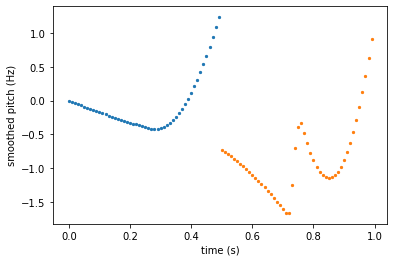

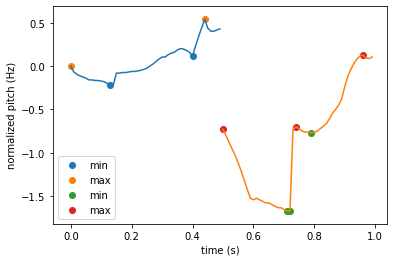

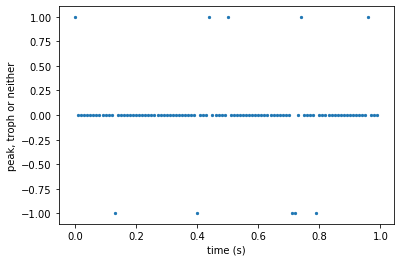

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d


def read_file2(fileIN):
    data = []
    with open(fileIN,"r") as file:
        for line in file:
            split = line.split()
            sentence = []
            for word in split:
                sentence.append(float(word))
            data.append(sentence)
    file.close()
    return np.array(data)

def determine_peaks(data,precision):
    halfway = int(len(data)/2)
    indexMax = argrelextrema(data[:halfway],np.greater_equal,order=precision)[0]
    indexMin = argrelextrema(data[:halfway],np.less_equal,order=precision)[0]
    indexMax2 = argrelextrema(data[halfway:len(data)],np.greater_equal,order=precision)[0]+halfway
    indexMin2 = argrelextrema(data[halfway:len(data)],np.less_equal,order=precision)[0]+halfway
    return indexMax,indexMin,indexMax2,indexMin2

def test_single_plot(time,data,precision):
    halfway = int(len(data)/2)
    indexMax,indexMin,indexMax2,indexMin2 = determine_peaks(data,precision)
    
    fig,frame = plt.subplots(1,1)
    psize = 2
    # frame.scatter(time,sound,s=psize)
    frame.plot(time[:halfway],data[:halfway])
    frame.plot(time[halfway:len(data)],data[halfway:len(data)])
    
    frame.scatter(time[indexMin],data[indexMin],label="min")
    frame.scatter(time[indexMax],data[indexMax],label="max")
    frame.scatter(time[indexMin2],data[indexMin2],label="min")
    frame.scatter(time[indexMax2],data[indexMax2],label="max")
    
    frame.set_xlabel("time (s)")
    frame.set_ylabel("normalized pitch (Hz)")
    
    frame.legend()
    plt.show()
    
def reduction_trophs(data,precision):
    indexMax,indexMin,indexMax2,indexMin2 = determine_peaks(data,precision)
    reduced = np.zeros(len(data))
    reduced[indexMax] += 1
    reduced[indexMin] -= 1
    reduced[indexMax2] += 1
    reduced[indexMin2] -= 1
    
    fig,frame = plt.subplots(1,1)
    psize = 5
    time = np.arange(len(reduced))/len(reduced)
    frame.scatter(time,reduced,s=psize)
    
    frame.set_xlabel("time (s)")
    frame.set_ylabel("peak, troph or neither")
    plt.show()
    
def smooth_peaks(data,precision):
    halfway = int(len(data)/2)
    indexMax,indexMin,indexMax2,indexMin2 = determine_peaks(data,precision)
    
    indexMax = indexMax.tolist()
    indexMin = indexMin.tolist()
    indexMax2 = indexMax2.tolist()
    indexMin2 = indexMin2.tolist()
    
    peaks = sorted(indexMax + indexMin)
    peaks2 = sorted(indexMin2+indexMax2)
    
    time = np.arange(len(data))/len(data)
    kind = "quadratic"
    cs = interp1d(time[peaks],data[peaks],bounds_error=False,fill_value="extrapolate",kind=kind)
    cs2 = interp1d(time[peaks2],data[peaks2],bounds_error=False,fill_value="extrapolate",kind=kind)
    
    fig =plt.figure()
    frame = fig.add_subplot(1,1,1)
    psize = 5
    frame.scatter(time[:halfway],cs(time[:halfway]),s=psize)
    frame.scatter(time[halfway:len(data)],cs2(time[halfway:len(data)]),s=psize)
    frame.set_xlabel("time (s)")
    frame.set_ylabel("smoothed pitch (Hz)")
    plt.show()
    

    
pitch = read_file2("./data/pitch_data_questions_processed_pitch.txt")
#plot_pitch_data(data)
N = 2
P = 5
time = np.arange(len(pitch[N]))/len(pitch[N])

smooth_peaks(pitch[N],P)
test_single_plot(time,pitch[N],P)
reduction_trophs(pitch[N],P)

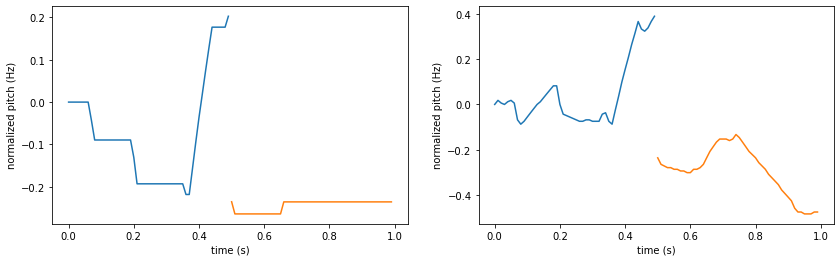

['Lower', 'Lower', 'Lower', 'Higher', 'Higher']
['Lower', 'Higher']


In [36]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d


def read_file2(fileIN):
    data = []
    with open(fileIN,"r") as file:
        for line in file:
            split = line.split()
            sentence = []
            for word in split:
                sentence.append(float(word))
            data.append(sentence)
    file.close()
    return np.array(data)

def test_single_plot(time,data,precision,frame):
    halfway = int(len(data)/2)    
    #fig,frame = plt.subplots(1,1)
    psize = 2
    # frame.scatter(time,data,s=psize)
    frame.plot(time[:halfway],data[:halfway])
    frame.plot(time[halfway:len(data)],data[halfway:len(data)])
    
    
    frame.set_xlabel("time (s)")
    frame.set_ylabel("normalized pitch (Hz)")
    
#     frame.legend()
    plt.show()
    return

def determine_smooth_gradient_data(data,time,boundary):
    slope = np.gradient(data,time)
    smooth = [data[0]]
    for idx,dx in enumerate(slope[:len(slope)-1]):
        if np.abs(dx) >= boundary:
            smooth.append(data[idx+1])
        else:
            smooth.append(smooth[idx])
    return smooth

def determine_smooth_gradient_change(data,time,boundary):
    slope = np.gradient(data,time)
    smooth = [data[0]]
    for idx,dx in enumerate(slope[:len(slope)-1]):
        if np.abs(dx) >= boundary:
            smooth.append(smooth[idx]+0.01*dx)
        else:
            smooth.append(smooth[idx])
    return smooth

def find_gradient(data,time,boundary):
    slope = np.gradient(data,time)
    changes = np.zeros(len(data))
    abChange = np.zeros(len(data))
    
    for idx,dx in enumerate(slope):
        if dx >= boundary:
            changes[idx] += 1
            abChange[idx] += 1
        elif dx <= -1*boundary:
            changes[idx] -= 1
            abChange[idx] += 1
    return changes,abChange

def reduction_gradient(data,boundary):
    halfway = int(len(data)/2)
    time = np.arange(len(data))/len(data)
    
    change1,abChange1 = find_gradient(data[:halfway],time[:halfway],boundary)
    change2,abChange2 = find_gradient(data[halfway:len(data)],time[halfway:len(data)],boundary)
        
    fig = plt.figure(figsize=(13,4))
    frame1 = fig.add_subplot(1,2,1)
    frame2 = fig.add_subplot(1,2,2)
    
    psize = 6
    c1 = "#1f77b4" #"#ff7f0e"
    c2 = c1#"#ff7f0e"
    frame1.scatter(time[:halfway],change1,s=psize,c=c1)
    frame1.scatter(time[halfway:len(data)],change2,s=psize,c=c2)
        
    frame1.set_xlabel("time (s)")
    frame1.set_ylabel("normalized pitch (Hz)")
    
    frame2.scatter(time[:halfway],abChange1,s=psize,c=c1)
    frame2.scatter(time[halfway:len(data)],abChange2,s=psize,c=c2)
        
    frame2.set_xlabel("time (s)")
    frame2.set_ylabel("normalized pitch (Hz)")
    
def plot_smooth(data,boundary):
    halfway = int(len(data)/2)
    time = np.arange(len(data))/len(data)
    
    smooth3 = determine_smooth_gradient_change(data[:halfway],time[:halfway],boundary)
    smooth4 = determine_smooth_gradient_change(data[halfway:len(data)],time[halfway:len(data)],boundary)
        
    fig,frames = plt.subplots(1,2,figsize=(14,4))
    frame2 = frames[1]
    frame = frames[0]
    psize = 2
    
    frame.plot(time[:halfway],smooth3)
    frame.plot(time[halfway:len(data)],smooth4)
        
    frame.set_xlabel("time (s)")
    frame.set_ylabel("normalized pitch (Hz)")
    return frame2

def gradient_case(number):
    if number == 1:
        return "step up"
    if number == -1:
        return "step down"
    else:
        return "flat"
    
def abstract_gradient(change):
    abstract = [gradient_case(change[0])]
    for i in range(1,len(change)):
        if (change[i] != change[i-1]):
            abstract.append(gradient_case(change[i]))
    return abstract

def change1(abstract):
    for i in range(len(abstract)):
        if i>0 and i<len(abstract)-1:
            if abstract[i]=="flat":
                if abstract[i-1]=="step up" and abstract[i+1]== "step down":
                    abstract[i]= "hill"
                elif abstract[i-1]=="step down" and abstract[i+1]== "step up":
                    abstract[i]= "troph"
    return abstract

def change2(abstract):
    newAbstract = []
    for i in range(1,len(abstract)):
        if abstract[i]=="flat":
            if abstract[i-1] == "step up":
                newAbstract.append("Higher")
            if abstract[i-1] == "step down":
                newAbstract.append("Lower")
    return newAbstract

def change3(abstract):
    newAbstract = []
    if abstract[0]=="flat":
        newAbstract.append("mid")
    for i in range(len(abstract)):
        if i>0 and i<len(abstract)-1:
            if abstract[i]=="flat":
                if abstract[i-1]=="step up" and abstract[i+1]== "step down":
                    newAbstract.append("hill")
                elif abstract[i-1]=="step down" and abstract[i+1]== "step up":
                    newAbstract.append("troph")
                else:
                    newAbstract.append("mid")
            if abstract[i]!="flat" and abstract[i+1]!="flat":
                if abstract[i] == "step up" and abstract[i]!=abstract[i+1]:
                    newAbstract.append("hill")
                if abstract[i] == "step down" and abstract[i]!=abstract[i+1]:
                    newAbstract.append("troph")
        if i == len(abstract)-1 and abstract[i]=="flat":
            newAbstract.append("mid")
    return newAbstract

def change4(abstract):
    newAbstract = []
    for i in range(len(abstract)):
        if abstract[i]=="step down":
            newAbstract.append("Lower")
        if abstract[i]=="step up":
            newAbstract.append("Higher")
    return newAbstract

def change_abstract(abstract,change=0):
    if change==0:
        return abstract
    if change==1:
        return change1(abstract)
    if change==2:
        return change2(abstract)
    if change==3:
        return change3(abstract)
    if change==4:
        return change4(abstract)
    
def print_abstract(data,boundary):
    halfway = int(len(data)/2)
    time = np.arange(len(data))/len(data)
    doChange = 4
    change1,abChange1 = find_gradient(data[:halfway],time[:halfway],boundary)
    change2,abChange2 = find_gradient(data[halfway:len(data)],time[halfway:len(data)],boundary)
    abstract1 = change_abstract(abstract_gradient(change1),doChange)
    abstract2 = change_abstract(abstract_gradient(change2),doChange)
    print(abstract1)
    print(abstract2)
    
pitch = read_file2("./data/pitch_data_statements_processed_pitch.txt")

N = 1
B = 2.5
time = np.arange(len(pitch[N]))/len(pitch[N])

frame1 = plot_smooth(pitch[N],B)
#reduction_gradient(pitch[N],B)
test_single_plot(time,pitch[N],B,frame1)
print_abstract(pitch[N],B)
